1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

Chat history for Q1: https://chatgpt.com/share/673e2915-6914-8004-bd67-dff3ecec7c00


2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

1.Accuracy measures the proportion of true results (both true positives and true negatives) in the population.

Sentiment analysis can be adressed by Accuracy: Sentiment analysis always classifying customer reviews as "positive" or "negative." If the dataset has an approximately equal number of positive and negative reviews, accuracy effectively evaluates the model’s performance/precise/accurate percentage in capturing both sentiments.

2.Sensitivity measures the proportion of actual positives that are correctly identified.
Medical Diagnosis can be adressed by sensitivity. when it comes to life-threatening conditions like cancer, diabetes, or COVID-19, missing a positive case (false negative) could delay treatment, leading to severe consequences. It's crucial to identify as many true positive cases as possible, even if it means some false positives.

3.Specificity measures the proportion of actual negatives that are correctly identified.
Spam Email Filtering can be adressed by specificity. when the system is classifying emails as "Spam" or "Not Spam", a false positive (marking a email as spam) could result in important emails being missed. High specificity ensures legitimate emails are not misclassified.

4.Precision measures the proportion of positive identifications that were actually correct.
Recommendation Systems can be adressed by precision. When a recommendation system is suggesting products, movies, or content to users, a false positive (irrelevant recommendation) can annoy users and reduce their trust in the system. High precision ensures only relevant and desirable items are recommended.

Chatbot history for Q1, Q2: https://chatgpt.com/share/673e2915-6914-8004-bd67-dff3ecec7c00

3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# Remove the specified columns
df = df.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with any NaN entries
df = df.dropna()

# Convert data types as specified
df['Pub year'] = df['Pub year'].astype(int)
df['NumPages'] = df['NumPages'].astype(int)
df['Hard_or_Paper'] = df['Hard_or_Paper'].astype('category')

4.  Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set. Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

Number of observations in the training set: 255
Number of observations in the testing set: 64


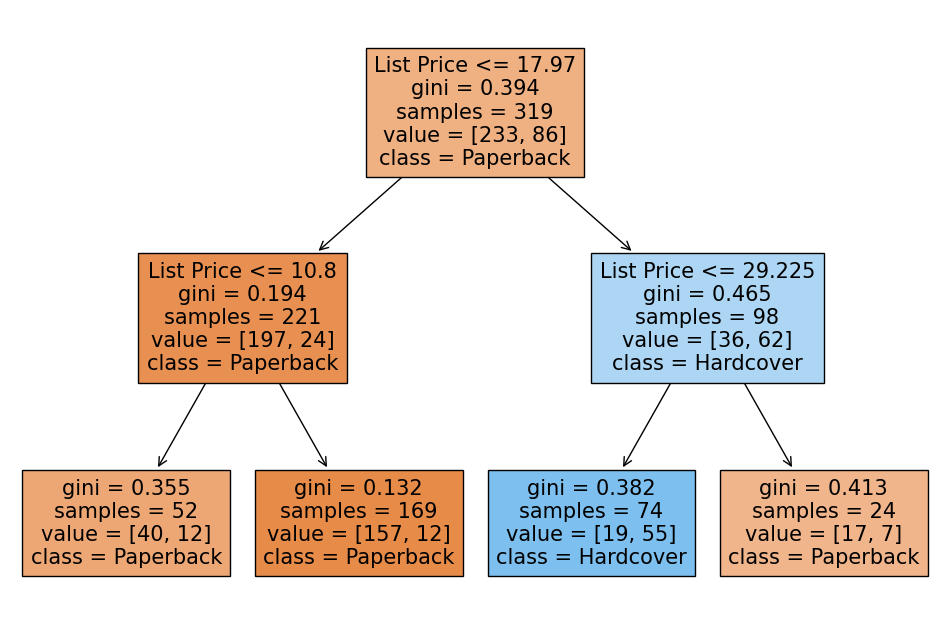

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(df, test_size=0.2, random_state=42)

# Print the number of observations in each set
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the testing set: {len(ab_reduced_noNaN_test)}")

y = pd.get_dummies(df["Hard_or_Paper"])['H']  # Converts the "Hard_or_Paper" column to a binary variable (1 for 'Hard', 0 otherwise)
X = df[['List Price']]  # Uses "List Price" as the predictor variable

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize and train the classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Plot the tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

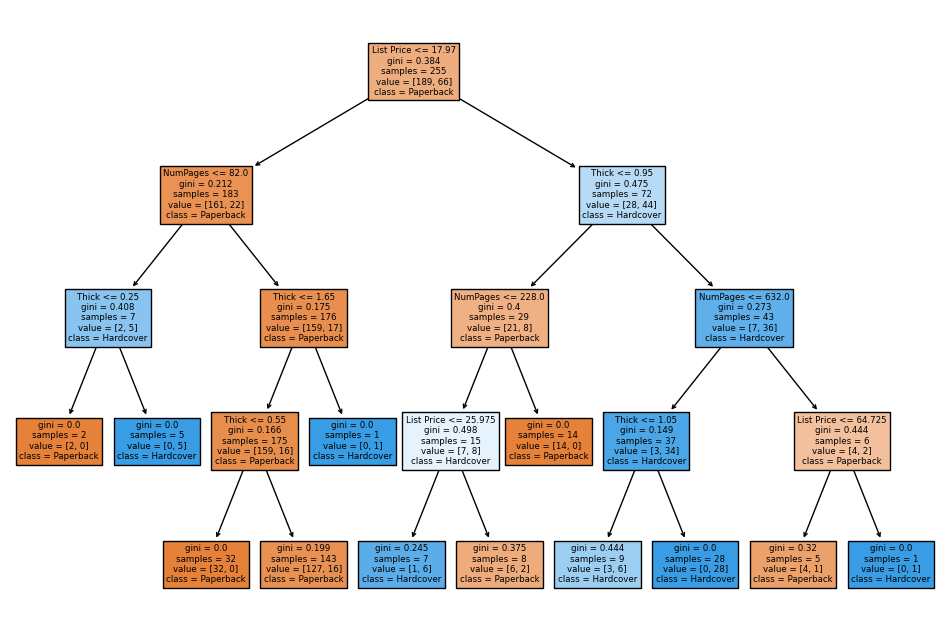

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define X and y
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]  # Features
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target variable (1 for Hardcover, 0 for Paperback)

# Initialize and train the classifier with max_depth=4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True
)
plt.show()


6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Define test features and target variable
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Predictions for clf and clf2
y_pred_clf = clf.predict(X_test)

# Assuming clf2 is a previously trained classifier
# y_pred_clf2 = clf2.predict(X_test) # Uncomment if clf2 exists

# Confusion matrix for clf
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)

# Function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)  # True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return sensitivity, specificity, accuracy

# Metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(conf_matrix_clf)

# Print results for clf
print("Metrics for clf:")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")



Metrics for clf:
Sensitivity: 0.75
Specificity: 0.91
Accuracy: 0.86


CHatbot history for Q3-Q6: https://chatgpt.com/share/673e2eff-aa64-8004-ba58-9c9dcd335da6

7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

The differences between the two confusion matrices are the features used in the predictions. The first model (clf) uses only the "List Price" feature, which limits its ability to capture complex patterns related to the actual outcome. The second model (clf2) have additional features ("NumPages" and "Thick"), letting it to better distinguish between the classes. Consequently, the confusion matrices for clf and clf2 are better because they use richer feature sets, improving their ability to classify accurately by higher true positive and true negative rates.

Chatbot history for Q7: https://chatgpt.com/share/673e30e6-22dc-8004-98b2-de98ac11048c